# DataFrame et Matrice (correction)

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Exercice 1 : créer un fichier Excel
    
On souhaite récupérer les données [donnees_enquete_2003_television.txt](http://www.xavierdupre.fr/enseignement/complements/donnees_enquete_2003_television.txt) (source : [INSEE](http://www.insee.fr/fr/themes/detail.asp?ref_id=fd-hdv03&page=fichiers_detail/HDV03/telechargement.htm)).

* ``POIDSLOG`` : Pondération individuelle relative
* ``POIDSF`` : Variable de pondération individuelle
* ``cLT1FREQ`` : Nombre d'heures en moyenne passées à regarder la télévision 
* ``cLT2FREQ`` : Unité de temps utilisée pour compter le nombre d'heures passées à regarder la télévision, cette unité est représentée par les quatre valeurs suivantes
    * 0 : non concerné
    * 1 : jour
    * 2 : semaine
    * 3 : mois 
    
Ensuite, on veut :

1. Supprimer les colonnes vides
2. Obtenir les valeurs distinctes  pour la colonne ``cLT2FREQ``
3. Modifier la matrice pour enlever les lignes pour lesquelles l'unité de temps (cLT2FREQ) n'est pas renseignée ou égale à zéro.
4. Sauver le résultat au format Excel.

Vous aurez peut-être besoin des fonctions suivantes :

* [numpy.isnan](http://docs.scipy.org/doc/numpy/reference/generated/numpy.isnan.html)
* [DataFrame.apply](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html)
* [DataFrame.fillna](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) ou 
[DataFrame.isnull](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isnull.html)
* [DataFrame.copy](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.copy.html)

In [ ]:
from pyquickhelper.loghelper import get_url_content
import pandas, io
from ensae_teaching_cs.data import donnees_enquete_2003_television
text = donnees_enquete_2003_television()
df = pandas.read_csv(text, sep="\t")
df.head()

POIDLOG        POIDSF  cLT1FREQ  cLT2FREQ  Unnamed: 4  Unnamed: 5  \
0  0.889422   4766.865201         2       1.0         NaN         NaN   
1  2.310209  12381.589746        30       1.0         NaN         NaN   
2  2.740070  14685.431344         6       2.0         NaN         NaN   
3  1.775545   9516.049939         1       1.0         NaN         NaN   
4  0.732512   3925.907588         3       1.0         NaN         NaN   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9     ...       Unnamed: 22  \
0         NaN         NaN         NaN         NaN     ...               NaN   
1         NaN         NaN         NaN         NaN     ...               NaN   
2         NaN         NaN         NaN         NaN     ...               NaN   
3         NaN         NaN         NaN         NaN     ...               NaN   
4         NaN         NaN         NaN         NaN     ...               NaN   

   Unnamed: 23  Unnamed: 24  Unnamed: 25  Unnamed: 26  Unnamed: 27  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 28  Unnamed: 29  Unnamed: 30  Unnamed: 31  
0          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN  

[5 rows x 32 columns]

In [ ]:
df = df [["POIDLOG","POIDSF","cLT1FREQ","cLT2FREQ"]]  # question 1
fill = df.copy()
fill.cLT2FREQ.fillna(0, inplace=True)
distinct = set(fill["cLT2FREQ"])  # question 2
print(distinct)

{0.0, 1.0, 2.0, 3.0}


In [ ]:
notnull = df [ ~df.cLT2FREQ.isnull() ]  # question 3
print(len(df),len(notnull))
notnull.tail()

8403 7386


POIDLOG        POIDSF  cLT1FREQ  cLT2FREQ
8397  0.502091   2690.961176         3         1
8398  0.306852   1644.574141         6         1
8399  2.501181  13405.104689         6         1
8400  1.382758   7410.905653         1         1
8401  0.343340   1840.132652         3         1

In [ ]:
notnull.to_excel("data.xlsx")  # question 4

Pour lancer Excel, vous pouvez juste écrire ceci :

In [ ]:
import os
os.system("data.xlsx")  # pour lancer Excel

0

Et vous devriez voir ce qui suit :

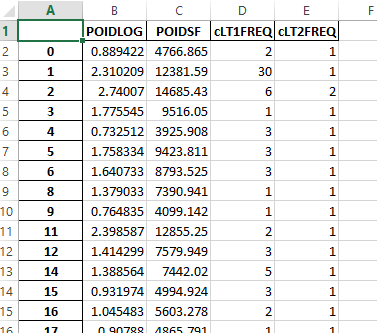

In [ ]:
from pyquickhelper.helpgen import NbImage
NbImage("td10exc.png")

## Exercice 2 : moyennes par groupes
    
Toujours avec le même jeu de données ([marathon.txt](http://www.xavierdupre.fr/enseignement/complements/marathon.txt)), on veut ajouter une ligne à la fin du tableau croisé dynamique contenant la moyenne en secondes des temps des marathons pour chaque ville.

In [ ]:
from ensae_teaching_cs.data import marathon
import pandas
df = pandas.read_csv(marathon(filename=True), 
                     sep="\t", names=["ville", "annee", "temps","secondes"])
df.head()

ville  annee     temps  secondes
0  PARIS   2011  02:06:29      7589
1  PARIS   2010  02:06:41      7601
2  PARIS   2009  02:05:47      7547
3  PARIS   2008  02:06:40      7600
4  PARIS   2007  02:07:17      7637

La solution requiert trois étapes.

1. Pour avoir la moyenne par villes, il faut grouper les lignes associées à la même villes.
2. Ensuite, il faut introduire ces moyennes dans la table initiale : on fusionne.
3. On effectue le même pivot que dans l'énoncé.

In [ ]:
# étape 1
# par défaut, la méthode groupby utilise la clé de group comme index
# pour ne pas le faire, il faut préciser as_index = False
gr = df[["ville","secondes"]].groupby("ville", as_index=False).mean()
gr.head()

ville     secondes
0  AMSTERDAM  7883.371429
1     BERLIN  7922.315789
2     BOSTON  7891.061224
3    CHICAGO  7815.909091
4    FUKUOKA  8075.187500

In [ ]:
# étape 2 - on ajoute une colonne
tout = df.merge( gr, on="ville")
tout.head()

ville  annee     temps  secondes_x   secondes_y
0  PARIS   2011  02:06:29        7589  7937.028571
1  PARIS   2010  02:06:41        7601  7937.028571
2  PARIS   2009  02:05:47        7547  7937.028571
3  PARIS   2008  02:06:40        7600  7937.028571
4  PARIS   2007  02:07:17        7637  7937.028571

In [ ]:
# étape 3
piv = tout.pivot("annee","ville","secondes_x")
piv.tail()

ville  AMSTERDAM  BERLIN  BOSTON  CHICAGO  FUKUOKA  LONDON  NEW YORK  PARIS  \
annee                                                                         
2007        7589    7466    8053     7871     7599    7661      7744   7637   
2008        7672    7439    7665     7585     7570    7515      7723   7600   
2009        7578    7568    7722     7541     7518    7510      7755   7547   
2010        7544    7508    7552     7583     7704    7519      7694   7601   
2011         NaN    7418    7382      NaN      NaN    7480       NaN   7589   

ville  STOCKOLM  
annee            
2007       8456  
2008       8163  
2009       8134  
2010       7968  
2011       8047

A partir de là, on ne voit pas trop comment s'en sortir. Voici ce que je propose :

1. On effectue un pivot sur la petite matrice des moyennes.
2. On ajoute ce second pivot avec le premier (celui de l'énoncé).

In [ ]:
gr["annee"] = "moyenne"
pivmean = gr.pivot("annee","ville","secondes")
pivmean

ville      AMSTERDAM       BERLIN       BOSTON      CHICAGO    FUKUOKA  \
annee                                                                    
moyenne  7883.371429  7922.315789  7891.061224  7815.909091  8075.1875   

ville        LONDON     NEW YORK        PARIS     STOCKOLM  
annee                                                       
moyenne  7695.16129  7928.560976  7937.028571  8133.393939

In [ ]:
piv = df.pivot("annee","ville","secondes")
pandas.concat( [ piv, pivmean ]).tail()

ville      AMSTERDAM       BERLIN       BOSTON      CHICAGO    FUKUOKA  \
annee                                                                    
2008     7672.000000  7439.000000  7665.000000  7585.000000  7570.0000   
2009     7578.000000  7568.000000  7722.000000  7541.000000  7518.0000   
2010     7544.000000  7508.000000  7552.000000  7583.000000  7704.0000   
2011             NaN  7418.000000  7382.000000          NaN        NaN   
moyenne  7883.371429  7922.315789  7891.061224  7815.909091  8075.1875   

ville        LONDON     NEW YORK        PARIS     STOCKOLM  
annee                                                       
2008     7515.00000  7723.000000  7600.000000  8163.000000  
2009     7510.00000  7755.000000  7547.000000  8134.000000  
2010     7519.00000  7694.000000  7601.000000  7968.000000  
2011     7480.00000          NaN  7589.000000  8047.000000  
moyenne  7695.16129  7928.560976  7937.028571  8133.393939

En résumé, cela donne (j'ajoute aussi le nombre de marathons courus) :

In [ ]:
from ensae_teaching_cs.data import marathon
import pandas
df = pandas.read_csv(marathon(filename=True), 
                     sep="\t", names=["ville", "annee", "temps","secondes"])
gr = df[["ville","secondes"]].groupby("ville", as_index=False).mean()
gr["annee"] = "moyenne"
pivmean = gr.pivot("annee","ville","secondes")
piv = df.pivot("annee","ville","secondes")

# bizarrement, la méthode count réintroduit l'index que je pensais avoir supprimé avec
# as_index=False.
# je le supprime de nouveau avec la méthode reset_index.
# la fonction count ne compte que les valeurs non manquantes.
df2 = df.copy()
df2["nb"]=1
grc = df2[["ville","secondes","nb"]].groupby("ville", as_index=False).sum()
grc["annee"] = "nb"
pivc = grc.pivot("annee","ville","nb")

res = pandas.concat( [ piv, pivmean, pivc ])
res.tail()

ville      AMSTERDAM       BERLIN       BOSTON      CHICAGO    FUKUOKA  \
annee                                                                    
2009     7578.000000  7568.000000  7722.000000  7541.000000  7518.0000   
2010     7544.000000  7508.000000  7552.000000  7583.000000  7704.0000   
2011             NaN  7418.000000  7382.000000          NaN        NaN   
moyenne  7883.371429  7922.315789  7891.061224  7815.909091  8075.1875   
nb         35.000000    38.000000    49.000000    33.000000    64.0000   

ville        LONDON     NEW YORK        PARIS     STOCKOLM  
annee                                                       
2009     7510.00000  7755.000000  7547.000000  8134.000000  
2010     7519.00000  7694.000000  7601.000000  7968.000000  
2011     7480.00000          NaN  7589.000000  8047.000000  
moyenne  7695.16129  7928.560976  7937.028571  8133.393939  
nb         31.00000    41.000000    35.000000    33.000000

## Exercice 3 : régression linéaire

On reproduit le début du programme proposé par l'énoncé.

In [ ]:
import pandas
from datetime import datetime, time
from ensae_teaching_cs.data import marathon
df = pandas.read_csv(marathon(filename=True), 
                     sep="\t", names=["ville", "annee", "temps","secondes"])
df = df [ (df["ville"] == "BERLIN") | (df["ville"] == "PARIS") ] 
for v in ["PARIS","BERLIN"]:
    df["est" + v] = df.apply( lambda r : 1 if r["ville"] == v else 0, axis=1)
df.head(n = 3)

ville  annee     temps  secondes  estPARIS  estBERLIN
0  PARIS   2011  02:06:29      7589         1          0
1  PARIS   2010  02:06:41      7601         1          0
2  PARIS   2009  02:05:47      7547         1          0

On va d'abord convertir la matrice en matrice ``numpy.matrix`` puis faire les calculs avec les notations matricielles :

In [ ]:
import numpy
Y = numpy.matrix(df[["secondes"]].as_matrix())
X = numpy.matrix(df[["annee","estPARIS","estBERLIN"]].as_matrix())
A = (X.T * X).I * X.T * Y
A

matrix([[ -3.39257988e+01],
        [  7.55705317e+04],
        [  7.55194699e+04]])

In [ ]:
numpy.column_stack([Y,X*A,X[:,1]])

matrix([[  7.58900000e+03,   7.34575036e+03,   1.00000000e+00],
        [  7.60100000e+03,   7.37967616e+03,   1.00000000e+00],
        [  7.54700000e+03,   7.41360196e+03,   1.00000000e+00],
        [  7.60000000e+03,   7.44752776e+03,   1.00000000e+00],
        [  7.63700000e+03,   7.48145356e+03,   1.00000000e+00],
        [  7.68300000e+03,   7.51537936e+03,   1.00000000e+00],
        [  7.68200000e+03,   7.54930516e+03,   1.00000000e+00],
        [  7.73600000e+03,   7.58323096e+03,   1.00000000e+00],
        [  7.59300000e+03,   7.61715675e+03,   1.00000000e+00],
        [  7.69800000e+03,   7.65108255e+03,   1.00000000e+00],
        [  7.78000000e+03,   7.68500835e+03,   1.00000000e+00],
        [  7.72900000e+03,   7.71893415e+03,   1.00000000e+00],
        [  7.69000000e+03,   7.75285995e+03,   1.00000000e+00],
        [  7.77700000e+03,   7.78678575e+03,   1.00000000e+00],
        [  7.81400000e+03,   7.82071155e+03,   1.00000000e+00],
        [  7.93800000e+03,   7.85463735e